In [1]:
import os

import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.append("/kaggle/src/")

from data._dataloader import SegDataset
from conf import ExpConfig

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/working/train_512_512.csv
4556


(512, 512, 3)


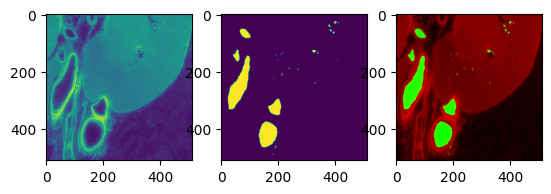

(512, 512, 3)


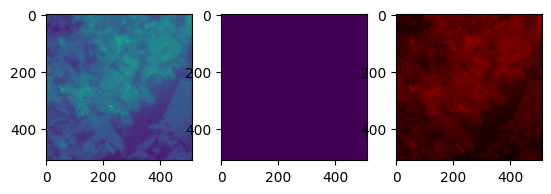

(512, 512, 3)


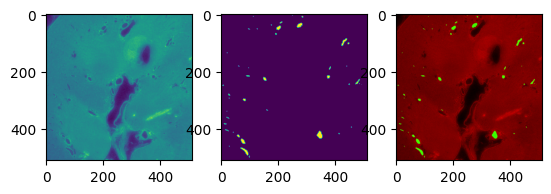

(512, 512, 3)


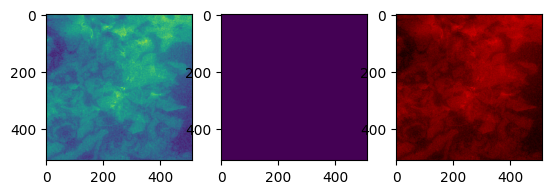

In [3]:
config = ExpConfig()
train_df_path = os.path.join(
    config.output_dir,
    f"{config.phase}_{config.stride_height}_{config.stride_width}.csv",
)
print(train_df_path)
df = pd.read_csv(train_df_path)
df = df[df["data_name"]=="kidney_1_dense"]
print(len(df))
dataset = SegDataset(df, config, phase="train")
dataloader = DataLoader(
    dataset,
    batch_size=4,
    num_workers=config.num_workers,
    shuffle=True,
    pin_memory=True,
)

for idx, (image, mask) in enumerate(dataloader):
    # print(idx)
    if torch.isnan(image).any():
        print("nan")
        print(image)
        raise ValueError
    for batch in range(image.shape[0]):
        image_mask = image[batch].numpy().copy()
        image_mask = (image_mask - image_mask.min()) / (image_mask.max() - image_mask.min())
        image_mask = np.concatenate([
                    np.expand_dims(image_mask[0], axis=-1), 
                    np.expand_dims(mask[batch][0].numpy(), axis=-1),
                    np.zeros_like(np.expand_dims(image_mask[0], axis=-1))
        ], axis=-1)
        # print(image[batch])
        if image[batch] is np.nan:
            print("nan")
            
        if idx == 0:
            print(image_mask.shape)
            plt.figure()
            plt.subplot(1,3,1)
            plt.imshow(image[batch,0,:,:])
            plt.subplot(1,3,2)
            plt.imshow(mask[batch,0,:,:])
            plt.subplot(1,3,3)
            plt.imshow(image_mask)
            plt.show()

   


/kaggle/working/valid_512_512.csv
4556


0
0
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.2073, 0.2073, 0.1914,  ..., 0.1846, 0.1846, 0.1846],
        [0.2073, 0.2073, 0.1914,  ..., 0.1846, 0.1846, 0.1846],
        [0.1982, 0.1982, 0.1823,  ..., 0.1846, 0.1891, 0.1891],
        ...,
        [0.1061, 0.1061, 0.1161,  ..., 0.0879, 0.0856, 0.0856],
        [0.1288, 0.1288, 0.1308,  ..., 0.0845, 0.0890, 0.0890],
        [0.1209, 0.1209, 0.1089,  ..., 0.0845, 0.0890, 0.0890]])
(512, 512, 3)


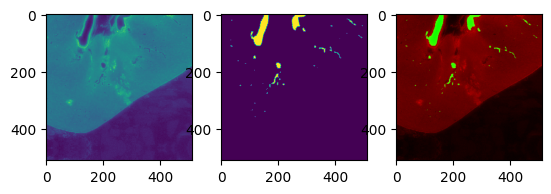

1
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.2836, 0.2845, 0.2856,  ..., 0.2723, 0.2733, 0.2782],
        [0.2856, 0.2835, 0.2833,  ..., 0.2725, 0.2774, 0.2827],
        [0.2864, 0.2811, 0.2828,  ..., 0.2802, 0.2804, 0.2824],
        ...,
        [0.2976, 0.2972, 0.2941,  ..., 0.3668, 0.3703, 0.3718],
        [0.2990, 0.2952, 0.2937,  ..., 0.3685, 0.3726, 0.3721],
        [0.2905, 0.2930, 0.2955,  ..., 0.3694, 0.3737, 0.3665]])
(512, 512, 3)


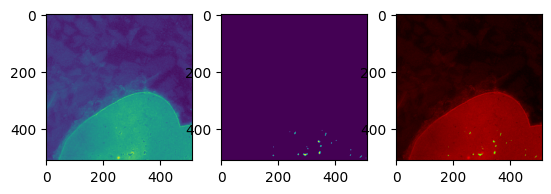

2
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.2043, 0.2043, 0.2046,  ..., 0.1984, 0.2020, 0.1973],
        [0.2043, 0.2043, 0.2046,  ..., 0.1984, 0.2020, 0.1973],
        [0.2020, 0.2020, 0.2067,  ..., 0.2372, 0.2357, 0.2318],
        ...,
        [0.2020, 0.2020, 0.1997,  ..., 0.1573, 0.1570, 0.1559],
        [0.2047, 0.2047, 0.2059,  ..., 0.1623, 0.1627, 0.1600],
        [0.2046, 0.2046, 0.2066,  ..., 0.1669, 0.1676, 0.1662]])
(512, 512, 3)


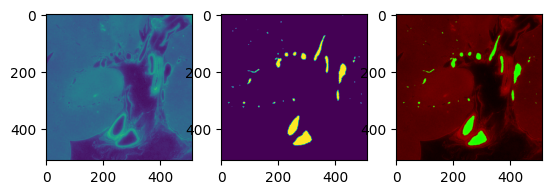

3
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
tensor([[0.3532, 0.3532, 0.3489,  ..., 0.2468, 0.2426, 0.2383],
        [0.3532, 0.3532, 0.3489,  ..., 0.2468, 0.2426, 0.2383],
        [0.3532, 0.3532, 0.3574,  ..., 0.2383, 0.2383, 0.2383],
        ...,
        [0.3532, 0.3532, 0.3574,  ..., 0.2596, 0.2596, 0.2553],
        [0.3447, 0.3447, 0.3489,  ..., 0.2511, 0.2511, 0.2511],
        [0.3532, 0.3532, 0.3489,  ..., 0.2511, 0.2553, 0.2553]])
(512, 512, 3)


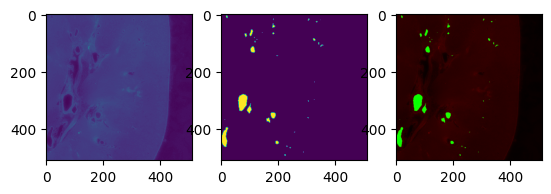

In [4]:
train_df_path = os.path.join(
    config.output_dir,
    f"valid_{config.stride_height}_{config.stride_width}.csv",
)
print(train_df_path)
df = pd.read_csv(train_df_path)
df = df[df["data_name"]=="kidney_1_dense"]
print(len(df))

dataset = SegDataset(df, config)
dataloader = DataLoader(
    dataset,
    batch_size=4,
    num_workers=config.num_workers,
    shuffle=True,
    pin_memory=True,
)

for idx, (image, mask) in enumerate(dataloader):
    print(idx)
    for batch in range(image.shape[0]):
        print(batch)
        print(image[batch].shape)
        print(mask[batch].shape)
        image_mask = image[batch].numpy().copy()
        image_mask = (image_mask - image_mask.min()) / (image_mask.max() - image_mask.min())
        image_mask = np.concatenate([
                    np.expand_dims(image_mask[0], axis=-1), 
                    np.expand_dims(mask[batch][0].numpy(), axis=-1),
                    np.zeros_like(np.expand_dims(image_mask[0], axis=-1))
        ], axis=-1)
        print(image[batch,0])
        print(image_mask.shape)
        plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(image[batch,0,:,:])
        plt.subplot(1,3,2)
        plt.imshow(mask[batch,0,:,:])
        plt.subplot(1,3,3)
        plt.imshow(image_mask)
        plt.show()

    break

